<a href="https://colab.research.google.com/github/Venumurala91/Numpy/blob/main/RFM_analysis_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # plotly.express is a library in plotly which is used to create interactive plots.
# # It is easily embedded in websites

# # Interactive:
# # The plots created are interactive by default, meaning users can zoom, hover over data points for more information, and even toggle visibility for elements.


import plotly.express as px
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [5, 4, 3, 2, 1],
    'category': ['A', 'B', 'C', 'D', 'E']
})

print(df)
# Create a scatter plot
fig = px.scatter(df, x='x', y='y', color='category')

# Show the plot
fig.show()


   x  y category
0  1  5        A
1  2  4        B
2  3  3        C
3  4  2        D
4  5  1        E


In [ ]:
# plotly.io: It is used to handle tasks like rendering, saving, and exporting Plotly visualizations in different formats.



import plotly.io as pio
import plotly.graph_objects as go

# Create a simple plotly graph object
fig = go.Figure(data=go.Scatter(x=[1, 2, 3], y=[3, 1, 6]))

# Save the figure as an interactive HTML file
pio.write_html(fig, 'plot.html')

# Show the figure in the notebook
pio.show(fig)




In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv("rfm_data.csv")

data.head()

data.info()
data.columns
data.shape
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


,0
CustomerID,0
PurchaseDate,0
TransactionAmount,0
ProductInformation,0
OrderID,0
Location,0


In [ ]:
from datetime import datetime

data['PurchaseDate']
data.head(3)
# data.columns


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York


In [ ]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data.head(3)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York


In [ ]:
# data['Recency'] = (datetime.now().date() - data['PurchaseDate'].dt.date).dt.days
data['Recency'] = (datetime.now() - data['PurchaseDate']).dt.days
#

data.head(3)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,728
1,2188,2023-04-11,463.70,Product A,176819,London,728
2,4608,2023-04-11,80.28,Product A,340062,New York,728


In [ ]:
# import pandas as pd

# # Sample data
# data = pd.DataFrame({
#     'CustomerID': [1, 1, 2, 2, 3],
#     'OrderID': [101, 102, 201, 202, 301],
#     'Amount': [200, 150, 300, 450, 100]
# })

# # Calculate Frequency: count of orders per CustomerID
# frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()

# # Rename the OrderID column to Frequency
# frequency_data.rename(columns={'OrderID': 'Frequence'}, inplace=True)

# # Merge frequency data back into the original data
# data = data.merge(frequency_data, on='CustomerID', how='left')

# print(data)


   CustomerID  OrderID  Amount  Frequence
0           1      101     200          2
1           1      102     150          2
2           2      201     300          2
3           2      202     450          2
4           3      301     100          1


In [ ]:
# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')
data.head(3)




,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,MonetaryValue_x,MonetaryValue_y,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,728,943.31,943.31,1
1,2188,2023-04-11,463.70,Product A,176819,London,728,463.70,463.70,1
2,4608,2023-04-11,80.28,Product A,340062,New York,728,80.28,80.28,1


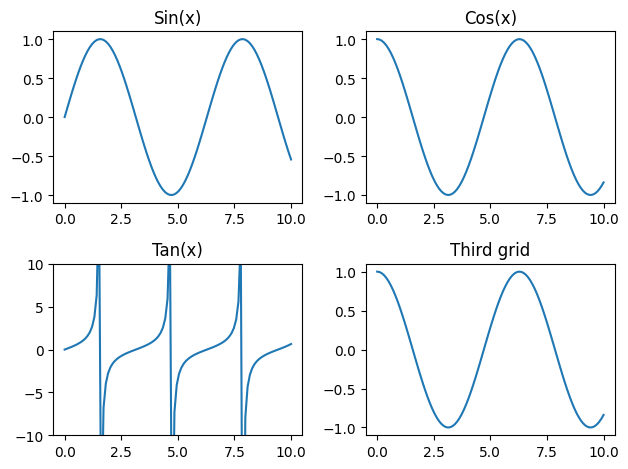

In [ ]:

# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')
data.head(3)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,MonetaryValue_x,MonetaryValue_y,Frequency,RecencyScore,FrequencyScore,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,728,943.31,943.31,1,1,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,728,463.70,463.70,1,1,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,728,80.28,80.28,1,1,1,80.28


In [ ]:
data.head(3)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,MonetaryValue_x,MonetaryValue_y,Frequency,RecencyScore,FrequencyScore,MonetaryValue,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,728,943.31,943.31,1,1,1,943.31,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,728,463.70,463.70,1,1,1,463.70,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,728,80.28,80.28,1,1,1,80.28,1,3,Low-Value


In [ ]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

# data.columns
data.head(3)


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,MonetaryValue_x,MonetaryValue_y,Frequency,RecencyScore,FrequencyScore,MonetaryValue,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,728,943.31,943.31,1,1,1,943.31,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,728,463.70,463.70,1,1,1,463.70,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,728,80.28,80.28,1,1,1,80.28,1,3,Low-Value


In [ ]:
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   MonetaryValue_x     1000 non-null   float64       
 8   MonetaryValue_y     1000 non-null   float64       
 9   Frequency           1000 non-null   int64         
 10  RecencyScore        1000 non-null   int64         
 11  FrequencyScore      1000 non-null   int64         
 12  MonetaryValue       1000 non-null   float64       
 13  MonetaryScore       1000 non-null   int64        

In [ ]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

data.head(3)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,MonetaryValue_x,MonetaryValue_y,Frequency,RecencyScore,FrequencyScore,MonetaryValue,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,728,943.31,943.31,1,1,1,943.31,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,728,463.70,463.70,1,1,1,463.70,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,728,80.28,80.28,1,1,1,80.28,1,3,Low-Value


In [ ]:
# Import necessary libraries
import plotly.express as px
import plotly.io as pio

# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
# print(segment_counts)
segment_counts.columns = ['Value Segment', 'Count']


# Set pastel colors
pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count',
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout for the chart
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                               yaxis_title='Count',
                               showlegend=False)

# Display the figure inline using `pio.renderers.default`
pio.renderers.default = 'colab'  # Explicitly set the renderer for Colab
fig_segment_dist.show()


  Value Segment  count
0     Low-Value    435
1     Mid-Value    386
2    High-Value    179


In [ ]:
data['RFM Customer Segments'] = ''
# data.head()

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
data[['CustomerID', 'RFM Customer Segments']]


,CustomerID,RFM Customer Segments
0,8814,Can't Lose
1,2188,Lost
2,4608,Lost
3,2559,Lost
4,9482,Can't Lose
...,...,...
995,2970,Potential Loyalists
996,6669,Potential Loyalists
997,8836,Potential Loyalists
998,1440,Potential Loyalists


In [ ]:
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['Value Segment', 'RFM Customer Segments'],
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

<ipython-input-117-5c90ffd743c2>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv("rfm_data.csv")
print(data.head())

from datetime import datetime

# Convert 'PurchaseDate' to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Calculate Recency
# data['Recency'] = (datetime.now().date() - data['PurchaseDate'].dt.date).dt.days
data['Recency'] = (datetime.now() - data['PurchaseDate']).dt.days


# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

# Define the pastel color palette
pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart with pastel colors
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count',
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['Value Segment', 'RFM Customer Segments'],
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()


# Filter the data to include only the customers in the Champions segment
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()


correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()


import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()


# Calculate the average Recency, Frequency, and Monetary scores for each segment
# segment_scores = data.groupby('RFM Customer Segments')['RecencyScore', 'FrequencyScore', 'MonetaryScore'].mean().reset_index()
segment_scores = data.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()


# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris  


<ipython-input-139-1133e7466a5d>:82: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

